In [29]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

# For building the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# For splitting the data
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [22]:
!pip install tensorflow

In [30]:
# Load the dataset
df = pd.read_csv('NFLX.csv')

# Display the first few rows of the dataset
df.head()

# Check for null values
print(df.isnull().sum())

# Get summary statistics
print(df.describe())


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
              Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07  


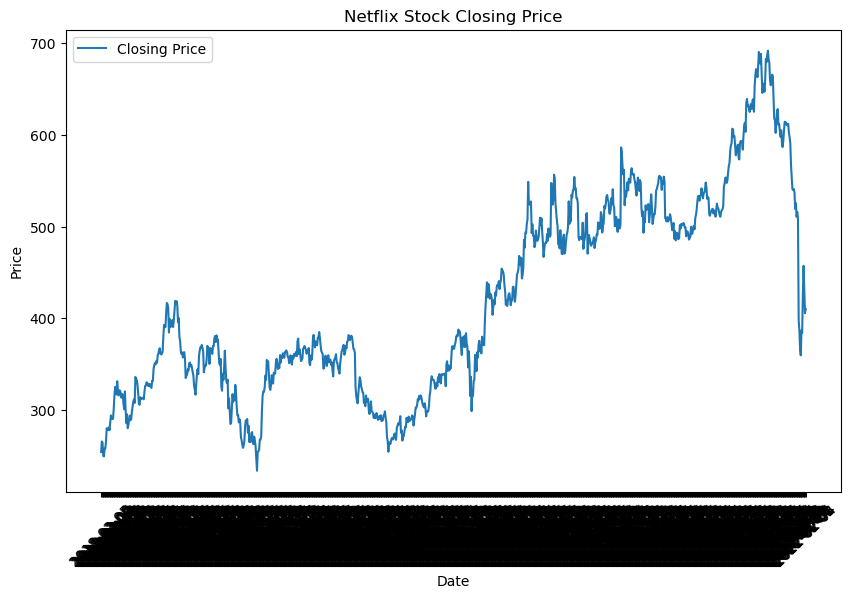

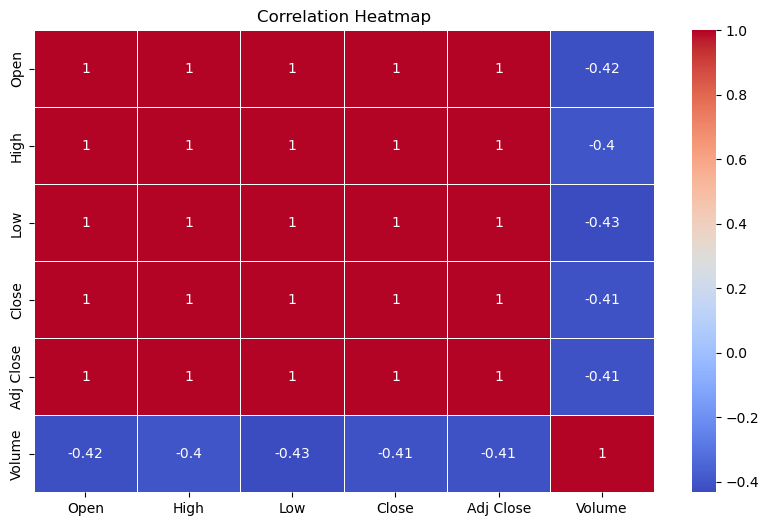

In [31]:
## Exploratory Data Analysis (EDA)
# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Netflix Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap of numeric features only
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



In [32]:
## Data Preprocessing
# Set the 'Date' column as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select only the 'Close' column
data = df[['Close']]

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training data with a lookback of 60 days
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.80)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create datasets
X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Reshape the input data to be 3D (required for LSTM)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [33]:
## Build and Train the LSTM Model
# Initialize the LSTM model
model = Sequential()

# Add LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add a Dense layer
model.add(Dense(units=25))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - loss: 0.0600 - val_loss: 0.0225
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0086 - val_loss: 0.0092
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0061 - val_loss: 0.0132
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0045 - val_loss: 0.0075
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0039 - val_loss: 0.0072
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0035 - val_loss: 0.0074
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0033 - val_loss: 0.0073
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0032 - val_loss: 0.0075
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0033 - val_loss: 0.0076
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0034 - val_loss: 0.0064
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0027 - val_loss: 0.0061
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.

In [34]:
## make prediction
# Predict stock prices
predicted_stock_price = model.predict(X_test)

# Inverse transform to get actual prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step


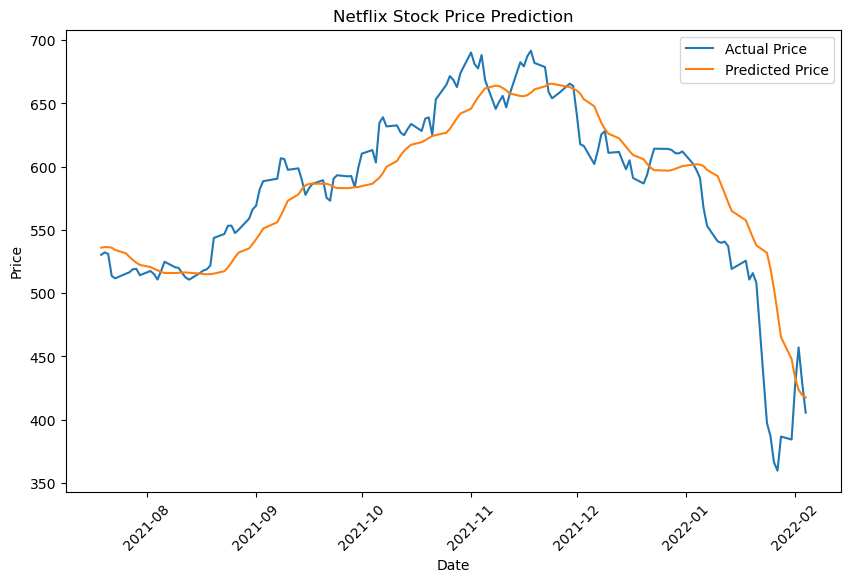

In [35]:
#Evaluate the Model
# Plot the predicted stock price and the actual price
plt.figure(figsize=(10, 6))
plt.plot(df.index[len(df) - len(y_test):], y_test_scaled, label='Actual Price')
plt.plot(df.index[len(df) - len(y_test):], predicted_stock_price, label='Predicted Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


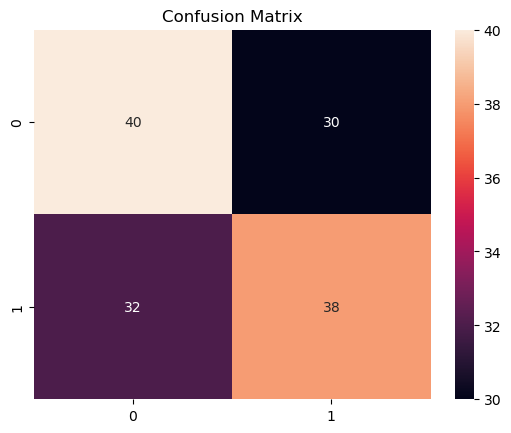

              precision    recall  f1-score   support

           0       0.56      0.57      0.56        70
           1       0.56      0.54      0.55        70

    accuracy                           0.56       140
   macro avg       0.56      0.56      0.56       140
weighted avg       0.56      0.56      0.56       140



In [36]:
# confusion matrix
min_length = min(len(y_test_classified), len(predicted_classified))
y_test_classified = y_test_classified[:min_length]
predicted_classified = predicted_classified[:min_length]


# Confusion Matrix
cm = confusion_matrix(y_test_classified_adjusted, predicted_classified)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test_classified, predicted_classified))


